<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/IMDB_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Downloading the data
imdb = tf.keras.datasets.imdb
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)
train_labels, test_labels = np.asarray(train_labels).astype('float32'),np.asarray(test_labels).astype('float32')

In [3]:
# Get the word index
word_index = imdb.get_word_index()

In [4]:
# Trying to decode a review by reversing the word index
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review_example = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # indices are shifted by 3!
print(decoded_review_example)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
# implementing one-hot encoding
def one_hot_encode(sequences,dimension=10000):
  result = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
      result[i,sequence] = 1
  return result
one_hot_train_data = one_hot_encode(train_data)
one_hot_test_data = one_hot_encode(test_data)
print("shape of one-hot encoded training data: {}".format(one_hot_train_data.shape))
print("shape of one-hot encoded test data: {}".format(one_hot_test_data.shape))

shape of one-hot encoded training data: (25000, 10000)
shape of one-hot encoded test data: (25000, 10000)


In [6]:
# Building the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4,input_shape = (10000,),kernel_regularizer = tf.keras.regularizers.l2(0.001),activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(4,kernel_regularizer = tf.keras.regularizers.l2(0.001),activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
# Compiling and training the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
r = model.fit(one_hot_train_data, train_labels, epochs = 10, validation_data= (one_hot_test_data,test_labels))

Epoch 1/10
782/782 [==============================] - 4s 6ms/step - loss: 0.4950 - accuracy: 0.8143 - val_loss: 0.3757 - val_accuracy: 0.8766
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3631 - accuracy: 0.8865 - val_loss: 0.3649 - val_accuracy: 0.8778
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3246 - accuracy: 0.9047 - val_loss: 0.3794 - val_accuracy: 0.8762
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3176 - accuracy: 0.9121 - val_loss: 0.4134 - val_accuracy: 0.8592
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2989 - accuracy: 0.9221 - val_loss: 0.4172 - val_accuracy: 0.8736
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3012 - accuracy: 0.9240 - val_loss: 0.4441 - val_accuracy: 0.8710
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2898 - accuracy: 0.9282 - val_loss: 0.4458 - val_accuracy: 0.8644
Epoch 

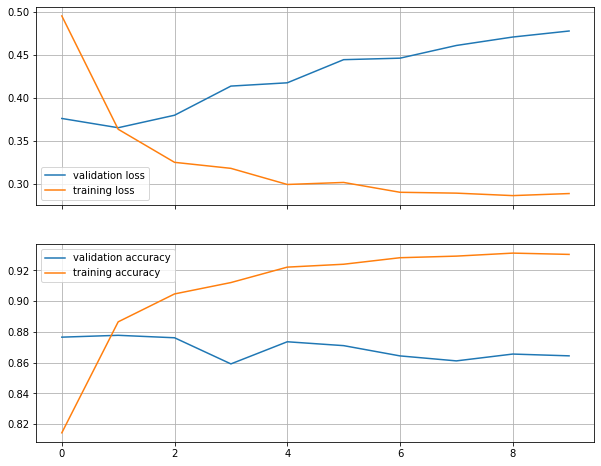

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()

In [9]:
# Padding the train sequences, in order to imlpement an embedding layer 
train_data_padded = tf.keras.preprocessing.sequence.pad_sequences(train_data,padding='pre')
L = train_data_padded.shape[1]
print("The length of the padded training sequences is: {}".format(L))

The length of the padded training sequences is: 2494


In [10]:
# Padding the test sequences
test_data_padded = tf.keras.preprocessing.sequence.pad_sequences(test_data,maxlen=L,padding='pre')

In [11]:
D = 20 #embedding dimensions
W = len(word_index)
# Building the model
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(L,)),
                             tf.keras.layers.Embedding(W+1,D),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
# Compiling and training the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
r = model.fit(train_data_padded, train_labels, epochs = 10, validation_data= (test_data_padded,test_labels))

Epoch 1/10
782/782 [==============================] - 17s 22ms/step - loss: 0.6784 - accuracy: 0.6516 - val_loss: 0.4620 - val_accuracy: 0.8586
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4394 - accuracy: 0.8775 - val_loss: 0.4021 - val_accuracy: 0.8806
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3738 - accuracy: 0.9068 - val_loss: 0.4024 - val_accuracy: 0.8823
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3343 - accuracy: 0.9265 - val_loss: 0.4228 - val_accuracy: 0.8770
Epoch 5/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3012 - accuracy: 0.9403 - val_loss: 0.4317 - val_accuracy: 0.8763
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2753 - accuracy: 0.9556 - val_loss: 0.4767 - val_accuracy: 0.8722
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2570 - accuracy: 0.9662 - val_loss: 0.4641 - val_accuracy:

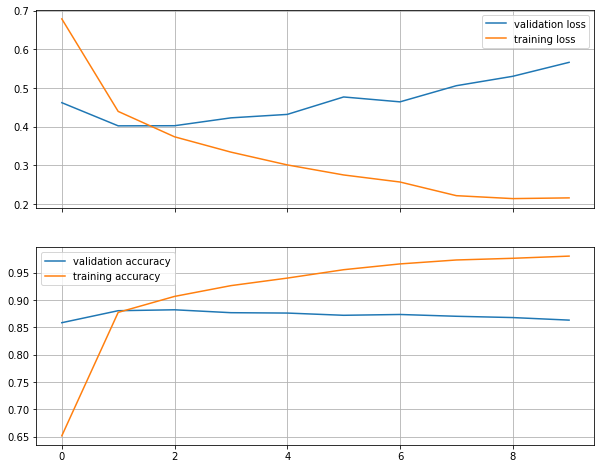

In [13]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()

In [14]:
# Alternative: 1D CNN
D = 20 #embedding dimensions
W = len(word_index)
# Building the model
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(L,)),
                             tf.keras.layers.Embedding(W+1,D),
                             tf.keras.layers.Conv1D(32,kernel_size=5,padding='same',activation='relu'),
                             tf.keras.layers.MaxPool1D(), 
                             tf.keras.layers.Conv1D(64,kernel_size=5,padding='same',activation='relu'),
                             tf.keras.layers.MaxPool1D(), 
                             tf.keras.layers.Flatten(),                                                  
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [15]:
# Compiling and training the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
r = model.fit(train_data_padded, train_labels, epochs = 10, validation_data= (test_data_padded,test_labels))

Epoch 1/10
782/782 [==============================] - 18s 24ms/step - loss: 0.3788 - accuracy: 0.8023 - val_loss: 0.2535 - val_accuracy: 0.8955
Epoch 2/10
782/782 [==============================] - 18s 24ms/step - loss: 0.1739 - accuracy: 0.9340 - val_loss: 0.2763 - val_accuracy: 0.8914
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1063 - accuracy: 0.9622 - val_loss: 0.3348 - val_accuracy: 0.8816
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0599 - accuracy: 0.9795 - val_loss: 0.4232 - val_accuracy: 0.8784
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.6070 - val_accuracy: 0.8750
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 0.7068 - val_accuracy: 0.8711
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.9198 - val_accuracy:

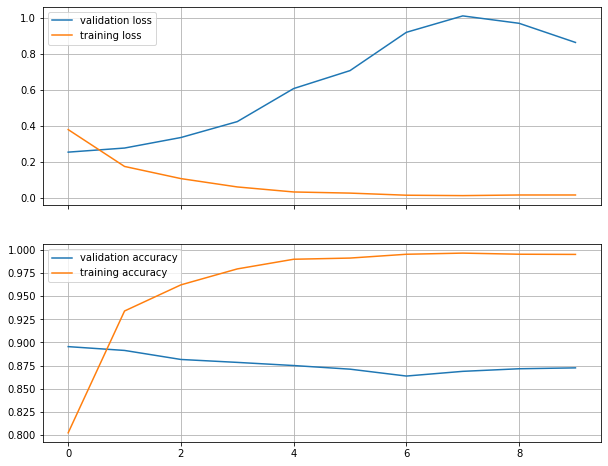

In [16]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()